In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [643]:
train = pd.read_csv('train.csv',encoding= 'latin1')
validation= pd.read_csv('test.csv',encoding='latin1')

In [726]:
train.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [645]:
train_data = train[['text','sentiment']]
validation_data = validation[['text', 'sentiment']]

In [646]:
train_data['text'].isnull().sum()

1

In [647]:
validation_data['text'].isnull().sum()

1281

In [648]:
train_data['text'].fillna('',inplace= True)
validation_data['text'].fillna('', inplace=True)

C:\Users\swarnadeep acharya\AppData\Local\Temp\ipykernel_10092\776538362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'].fillna('',inplace= True)
C:\Users\swarnadeep acharya\AppData\Local\Temp\ipykernel_10092\776538362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['text'].fillna('', inplace=True)


In [649]:
train_data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [650]:
to_drop = 'neutral'
train_data = train_data[train_data['sentiment'] != to_drop]
train_data

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
6,2am feedings for the baby are fun when he is a...,positive
...,...,...
27475,enjoy ur night,positive
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive


In [651]:
to_drop = 'neutral'
validation_data = validation_data[validation_data['sentiment'] != to_drop]
validation_data

,text,sentiment
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
5,that`s great!! weee!! visitors!,positive
...,...,...
4810,,NaN
4811,,NaN
4812,,NaN
4813,,NaN


In [652]:
validation_data.isnull().sum()

text            0
sentiment    1281
dtype: int64

In [653]:
train_data['sentiment'].replace({'positive': 1 , 'negative': 0}, inplace= True)
validation_data['sentiment'].replace({'positive': 1 , 'negative': 0}, inplace= True)

In [654]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
validation_data['sentiment']= imputer.fit_transform(validation_data[['sentiment']])

In [655]:
validation_data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [656]:
train_data

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,1
...,...,...
27475,enjoy ur night,1
27476,wish we could come see u on Denver husband l...,0
27477,I`ve wondered about rake to. The client has ...,0
27478,Yay good for both of you. Enjoy the break - y...,1


In [657]:
train_data.sentiment.isnull().sum()

0

In [658]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16363 entries, 1 to 27479
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       16363 non-null  object
 1   sentiment  16363 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 383.5+ KB


In [659]:
X_train = np.array(train_data['text'].tolist())
y_train = np.array(train_data['sentiment'].tolist())
X_test = np.array(validation_data['text'].tolist())
y_test = np.array(validation_data['sentiment'].tolist())

In [660]:
X_train

array([' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ' what interview! leave me alone',
       ...,
       ' I`ve wondered about rake to.  The client has made it clear .NET only, don`t force devs to learn a new lang  #agile #ccnet',
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.'], dtype='<U147')

In [661]:
X_train.shape

(16363,)

In [662]:
print(X_train[1])
print(y_train[1])

my boss is bullying me...
0


In [663]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 20000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
tokenizer.word_index

{'i': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'my': 5,
 'it': 6,
 'you': 7,
 'and': 8,
 'is': 9,
 's': 10,
 'for': 11,
 'in': 12,
 'that': 13,
 'of': 14,
 't': 15,
 'so': 16,
 'me': 17,
 'have': 18,
 'on': 19,
 'day': 20,
 'm': 21,
 'just': 22,
 'good': 23,
 'but': 24,
 'with': 25,
 'be': 26,
 'was': 27,
 'not': 28,
 'all': 29,
 'at': 30,
 'this': 31,
 'love': 32,
 'can': 33,
 'now': 34,
 'happy': 35,
 'like': 36,
 'out': 37,
 'up': 38,
 'are': 39,
 'get': 40,
 'no': 41,
 'too': 42,
 'your': 43,
 'go': 44,
 'today': 45,
 'http': 46,
 'work': 47,
 'really': 48,
 'do': 49,
 'got': 50,
 'going': 51,
 'we': 52,
 'thanks': 53,
 'im': 54,
 'u': 55,
 'one': 56,
 'had': 57,
 'from': 58,
 'what': 59,
 'am': 60,
 'its': 61,
 'time': 62,
 'about': 63,
 'there': 64,
 'lol': 65,
 'know': 66,
 'don': 67,
 'will': 68,
 'great': 69,
 'back': 70,
 'much': 71,
 'night': 72,
 'miss': 73,
 'com': 74,
 'they': 75,
 'see': 76,
 'hope': 77,
 'oh': 78,
 'well': 79,
 'new': 80,
 'some': 81,
 'when': 82,
 'as': 83,
 

In [664]:
print(X_train[1])
print(y_train[1])

[5, 1440, 9, 8039, 17]
0


In [665]:
from keras.utils import pad_sequences
X_train = pad_sequences(X_train, padding= 'post', maxlen = 50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)
print(X_train[3])

[5471   14  122  467   15   75  361  131   19    3 5472   52  195  581
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [666]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)


In [667]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(16363, 50, 1)
(3385, 50, 1)


In [739]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding
model = Sequential()
model.add(Embedding(input_dim = 20000, output_dim = 5,input_length=50))
model.add(SimpleRNN(50,return_sequences=False))
model.add(Dense(2, activation= 'softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 50, 5)             100000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)                2800      
                                                                 
 dense_11 (Dense)            (None, 2)                 102       
                                                                 
Total params: 102902 (401.96 KB)
Trainable params: 102902 (401.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [740]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [741]:
history = model.fit(X_train, y_train, epochs = 10 ,validation_data=(X_test,y_test))

Epoch 1/10
512/512 [==============================] - 9s 12ms/step - loss: 0.5997 - accuracy: 0.6586 - val_loss: 0.4290 - val_accuracy: 0.8877
Epoch 2/10
512/512 [==============================] - 6s 11ms/step - loss: 0.3635 - accuracy: 0.8571 - val_loss: 0.9947 - val_accuracy: 0.5096
Epoch 3/10
512/512 [==============================] - 6s 11ms/step - loss: 0.2366 - accuracy: 0.9149 - val_loss: 0.3403 - val_accuracy: 0.9072
Epoch 4/10
512/512 [==============================] - 5s 10ms/step - loss: 0.1540 - accuracy: 0.9473 - val_loss: 0.3218 - val_accuracy: 0.9001
Epoch 5/10
512/512 [==============================] - 5s 10ms/step - loss: 0.1339 - accuracy: 0.9576 - val_loss: 0.5041 - val_accuracy: 0.9055
Epoch 6/10
512/512 [==============================] - 5s 10ms/step - loss: 0.1046 - accuracy: 0.9664 - val_loss: 0.2620 - val_accuracy: 0.9037
Epoch 7/10
512/512 [==============================] - 5s 10ms/step - loss: 0.0858 - accuracy: 0.9722 - val_loss: 0.2999 - val_accuracy: 0.8934

In [742]:
loss, accuracy = model.evaluate(X_test,y_test)
print('loss:',loss)
print('accuracy',accuracy)

106/106 [==============================] - 1s 7ms/step - loss: 0.4833 - accuracy: 0.8919
loss: 0.48334720730781555
accuracy 0.8918759226799011


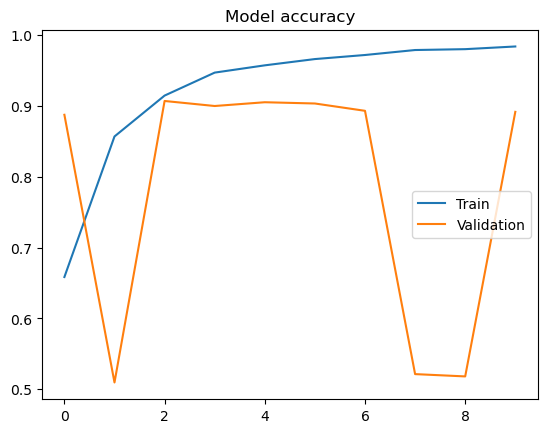

In [743]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()

In [752]:
text = ['I am feeling happy']
new_text = tokenizer.texts_to_sequences(text)
new_pad_text = pad_sequences(new_text, padding='post', maxlen=50)
new_dim = new_pad_text.reshape(( new_pad_text.shape[0],new_pad_text.shape[1],1))
prediction = model.predict(new_dim)
predicted_index = prediction.argmax(axis=-1)
if predicted_index[0] == 0:
      print('This is a negative sentiment')
else:
      print('This is a positive sentiment')


1/1 [==============================] - 0s 45ms/step
This is a positive sentiment


In [749]:
text = ['I want to kill you!']
new_text = tokenizer.texts_to_sequences(text)
new_pad_text = pad_sequences(new_text, padding='post', maxlen=50)
new_dim = new_pad_text.reshape(( new_pad_text.shape[0],new_pad_text.shape[1],1))
prediction = model.predict(new_dim)
predicted_index = prediction.argmax(axis=-1)
if predicted_index[0] == 0:
      print('This is a negative sentiment')
else:
      print('This is a positive sentiment')


1/1 [==============================] - 0s 35ms/step
This is a negative sentiment
